In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [713]:
# Opening the CSV files
test = pd.read_csv('test_data.csv',encoding='cp1252')
training = pd.read_csv('training_data.csv',encoding='cp1252')

In [714]:
# Checking the collumns names
training.keys()

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [715]:
# Dataset Head
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [716]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [717]:
# Dataset Description
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


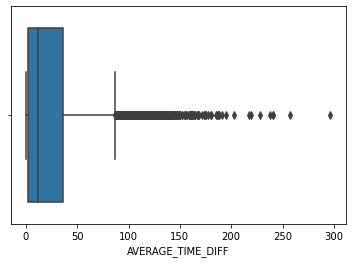

In [718]:
# Checking it there is outliers
ax1 = sns.boxplot(x=training['AVERAGE_TIME_DIFF'])

In [719]:
# Removing the outliers
training = training.loc[training['AVERAGE_TIME_DIFF']<=200]

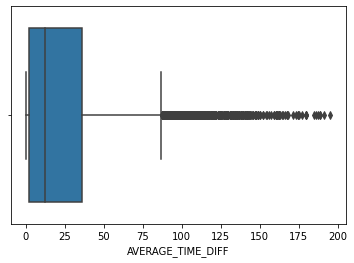

In [720]:
# Checking it the outliers
ax1 = sns.boxplot(x=training['AVERAGE_TIME_DIFF'])

In [721]:
# Checking LUMINOSITY qualitative classifiers
training['LUMINOSITY'].unique()

array(['LIGHT', 'LOW_LIGHT', 'DARK'], dtype=object)

In [722]:
# Checking AVERAGE_CLOUDINESS qualitative classifiers
training['AVERAGE_CLOUDINESS'].unique()

array([nan, 'céu claro', 'nuvens dispersas', 'céu pouco nublado',
       'céu limpo', 'algumas nuvens', 'nuvens quebrados', 'tempo nublado',
       'nuvens quebradas', 'nublado'], dtype=object)

In [723]:
# Changing qualitative classifiers to quantitative classifiers

training_luminosity_qt = {'LIGHT': 0, 'LOW_LIGHT': 1, 'DARK': 2}
training_cloudiness_qt = {'céu claro': 0, 'nuvens dispersas': 1, 'céu pouco nublado': 2, 'céu limpo': 3, 'algumas nuvens': 4, 'nuvens quebrados': 5, 'tempo nublado': 6, 'nuvens quebradas': 7, 'nublado': 8}

training.replace(training_luminosity_qt, inplace = True)
training.replace(training_cloudiness_qt, inplace = True)

In [724]:
# Seeing if there is any missing values
training.isna().any()

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
dtype: bool

In [725]:
# Seeing how many missing values are in each collumn
print(training.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2680
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6240
dtype: int64


<AxesSubplot:>

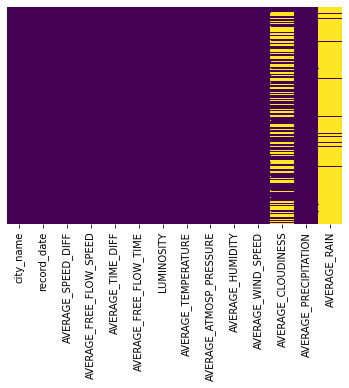

In [726]:
# Checking the heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [727]:
# Because there are a almost no data if AVERAGE_RAIN, we will drop this collumn
training = training.drop(['AVERAGE_RAIN'], axis=1)
test = test.drop(['AVERAGE_RAIN'], axis=1)

In [728]:
# Now we are filling the missing Data via interpolation
training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].fillna(method='bfill')
training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].interpolate(method='linear',limit_direction='forward')

<AxesSubplot:>

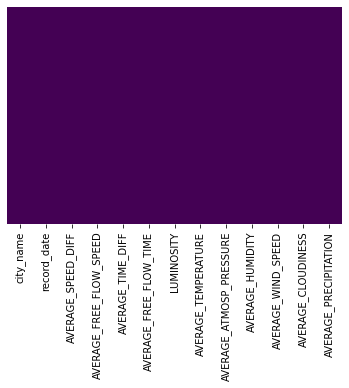

In [729]:
# Checking the heatmap again so we can see that no value is missing now
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [730]:
# Finnaly we will remove the rows where the values are all the same
for name in training.keys():
    if name != 'city_name':
        listaDados = training[name]
        element = listaDados[0]
        chk     = True
        for item in listaDados:
            if element != item:
                chk = False
                break;
        if chk:
            training = training.drop([name], axis=1)
            test = test.drop([name], axis=1)

<AxesSubplot:>

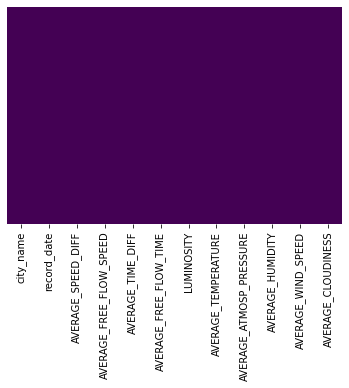

In [731]:
# Checking the heatmap again so we can see that no value is missing now
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [732]:
# Por fim iremos eliminar possíveis linhas duplicadas 
training = training.drop_duplicates(subset=('city_name','record_date'), keep='first')

<AxesSubplot:>

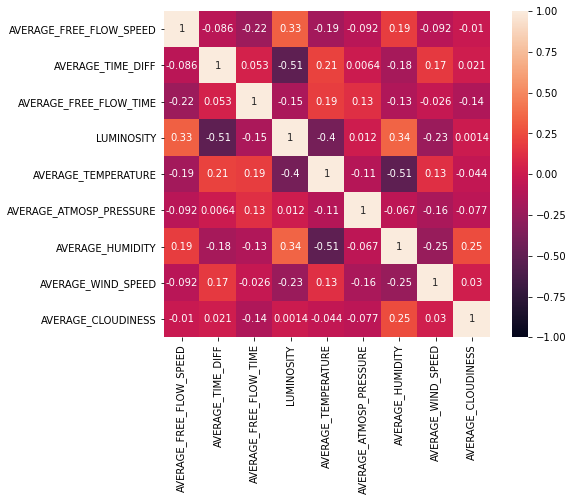

In [733]:
# Matriz de coorelação
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [734]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,0,15.0,1019.0,100.0,3.0,0.0
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,0,21.0,1021.0,53.0,5.0,0.0
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,0,26.0,1014.0,61.0,4.0,0.0
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,0,18.0,1025.0,48.0,4.0,0.0
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,0,15.0,1008.0,82.0,10.0,1.0


In [743]:
X = training.drop(['AVERAGE_SPEED_DIFF', 'city_name', 'record_date'], axis=1)
y = training['AVERAGE_SPEED_DIFF']

In [754]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2021)

In [755]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [756]:
predictions = logmodel.predict(X_test)
predictions

array(['Low', 'None', 'Medium', ..., 'None', 'None', 'None'], dtype=object)

In [757]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))
print("You have got %0.2f accuracy in this prediction" % accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

        High       0.75      0.67      0.71       269
         Low       0.69      0.67      0.68       352
      Medium       0.75      0.77      0.76       410
        None       0.86      0.92      0.89       551
   Very_High       0.79      0.75      0.77       119

    accuracy                           0.78      1701
   macro avg       0.77      0.76      0.76      1701
weighted avg       0.78      0.78      0.78      1701

You have got 0.78 accuracy in this prediction


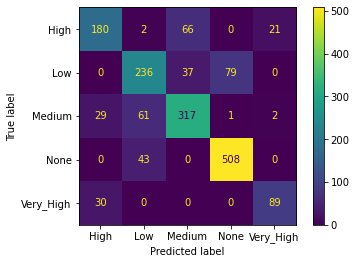

In [758]:
plt = plot_confusion_matrix(logmodel, X_test, y_test)

In [752]:
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(predictions[:1500]).tolist() }
# data

In [753]:
predict_DataFrame = pd.DataFrame(data)
predict_DataFrame

,RowId,Speed_Diff
0,1,Low
1,2,None
2,3,Medium
3,4,High
4,5,High
...,...,...
1495,1496,None
1496,1497,None
1497,1498,None
1498,1499,Low


In [629]:
predict_DataFrame.to_csv('Resultados/submit5.csv',index=False)

In [ ]:
# Retirar outliers de alguns que possam tar a mais
# Retirar coluna do PRECPITATION
# Ver os 3 modelos, SVC, Tree, e Regression
#sns countplot